In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
xls = pd.ExcelFile('data/data.xlsx')
df_sales = pd.read_excel(xls, 'Sheet1', header = 4, usecols=('C:J'))
df_consumer = pd.read_excel(xls, 'Sheet2')
df_store = pd.read_excel(xls, 'Sheet3')
df_product = pd.read_excel(xls, 'Sheet4')
# xls

In [3]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [4]:
df_consumer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      73 non-null     object
 1   Name    73 non-null     object
 2   Size    73 non-null     object
dtypes: object(3)
memory usage: 1.8+ KB


In [5]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           13650 non-null  int64         
 1   City         13650 non-null  object        
 2   State        13650 non-null  object        
 3   DateOfBirth  13650 non-null  datetime64[ns]
 4   Sex          13650 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 533.3+ KB


In [6]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7 non-null      int64 
 1   Name    7 non-null      object
 2   State   7 non-null      object
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [7]:
df_sales.duplicated().sum()

0

In [8]:
discount_price = (1 - df_sales['Discount']) * df_sales['UnitPrice'] * df_sales['Quantity']
df_sales['discount_price'] = discount_price
df_sales

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,discount_price
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,0.08,249.2,1,4,2018-12-10,229.264
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25,146.160
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17,175.140
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,0.10,201.6,2,1,2018-04-10,362.880
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21,365.400
...,...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,0.08,218.4,1,4,2018-12-02,200.928
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,0.08,210.0,1,4,2018-12-05,193.200
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01,136.528
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,0.10,218.4,2,4,2019-11-25,393.120


In [9]:
final_table_columns = ['StoreID','discount_price']
df_best_product = df_sales[df_sales.columns.intersection(final_table_columns)]

In [10]:
df_best_product_sum = df_best_product.groupby('StoreID', as_index =False).sum()
df_best_product_sum

,StoreID,discount_price
0,1,1759625.756
1,2,1440794.068
2,3,1307870.956
3,4,1114212.484
4,7,760434.696
5,9,393471.176
6,22,197442.168


In [11]:
df_best_product_sum['Name'] = df_product['Name']
df_best_product_sum

,StoreID,discount_price,Name
0,1,1759625.756,Florianópolis
1,2,1440794.068,Rio de Janeiro
2,3,1307870.956,Porto Alegre
3,4,1114212.484,Curitiba
4,7,760434.696,São Paulo
5,9,393471.176,Belo Horizonte
6,22,197442.168,Online


Text(0.5, 1.0, 'Cidade que mais arrecadou')

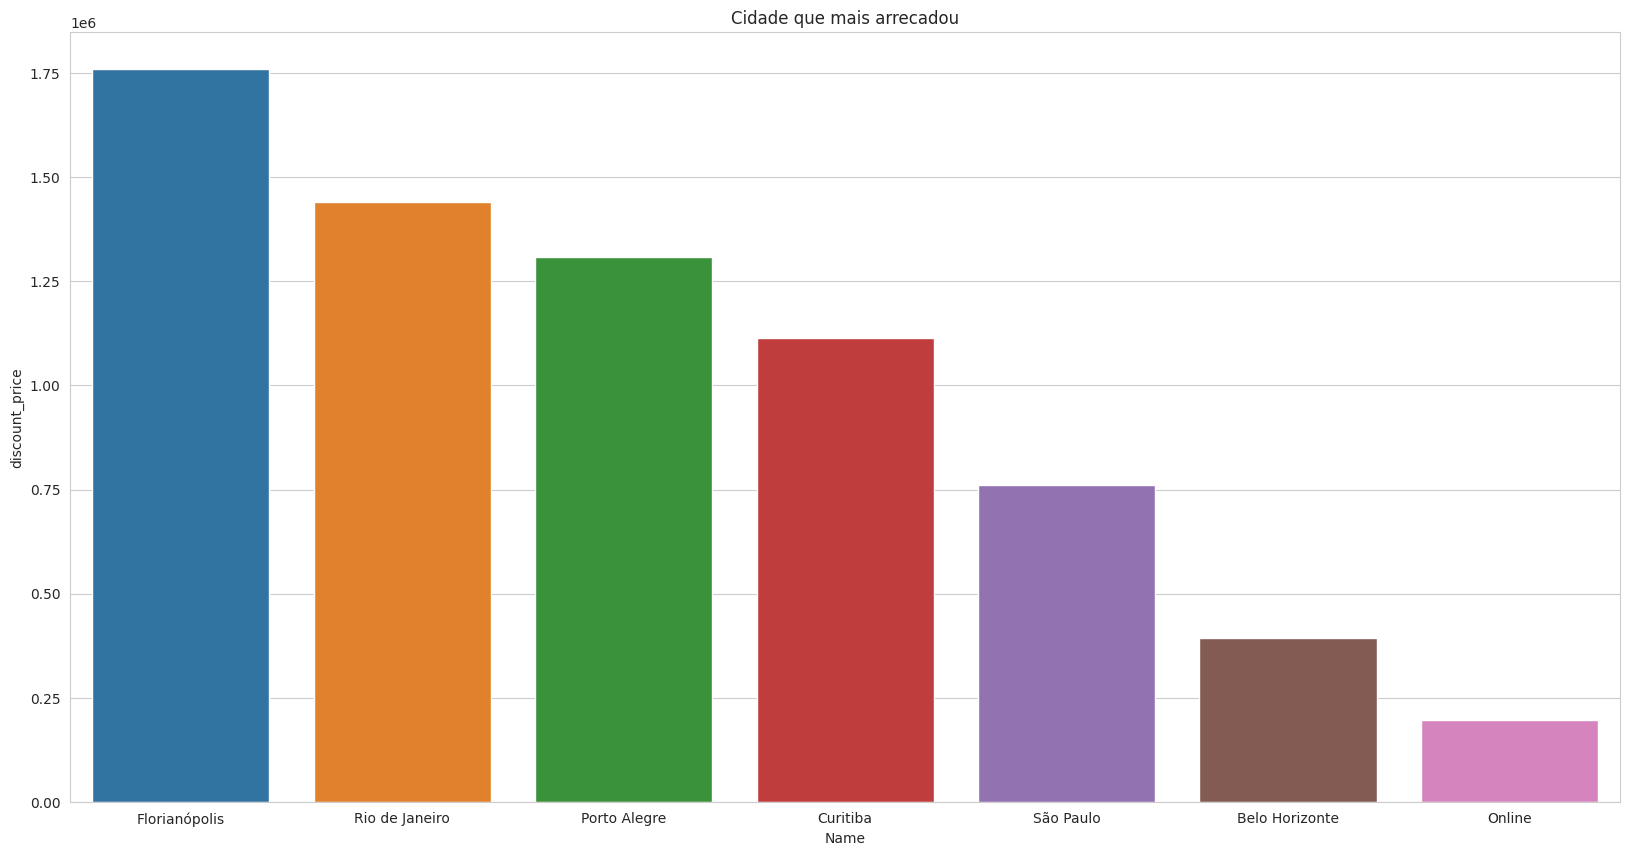

In [12]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df_best_product_sum, \
            x='Name', \
            y='discount_price').set_title('Cidade que mais arrecadou')

In [13]:
final_table_columns = ['ProductID','discount_price']
df_best_consumer = df_sales[df_sales.columns.intersection(final_table_columns)]
df_best_consumer

,ProductID,discount_price
0,002552c0663708129c0019cc97552d7d3,229.264
1,001b237c0e9bb435f2e54071129237e93,146.160
2,00066f42aeeb9f3007548bb9d3f33c381,175.140
3,001b72dfd63e9833e8c02742adf472e33,362.880
4,00210e41887c2a8ef9f791ebc780cc363,365.400
...,...,...
32748,002ec297b1b00fb9dde7ee6ac24b67712,200.928
32749,002d4ea7c04739c130bb74d7e7cd16943,193.200
32750,001795ec6f1b187d37335e1c4704762e3,136.528
32751,002ec297b1b00fb9dde7ee6ac24b67713,393.120


In [14]:
df_best_consumer = df_best_consumer.groupby('ProductID', as_index =False).sum()
df_best_consumer

,ProductID,discount_price
0,00066f42aeeb9f3007548bb9d3f33c381,45875.004
1,00066f42aeeb9f3007548bb9d3f33c382,39235.252
2,00066f42aeeb9f3007548bb9d3f33c383,163635.248
3,00088930e925c41fd95ebfe695fd26551,24023.328
4,00088930e925c41fd95ebfe695fd26552,22503.936
...,...,...
68,0030e635639c898b323826589761cf233,164600.800
69,003128f981470c3e5a2e7445e4a771cd1,33591.040
70,003128f981470c3e5a2e7445e4a771cd2,37120.160
71,003128f981470c3e5a2e7445e4a771cd3,80190.880


In [15]:
df_best_consumer_name = df_best_consumer
for ID in range(len(df_best_consumer['ProductID'])):
    for ProductID in range(len(df_consumer['ID'])):
        if df_best_consumer['ProductID'][ID] == df_consumer['ID'][ProductID]:
            # df_best_consumer_name['ProductID'][ID] = df_consumer['Name'][ProductID]
            df_best_consumer_name['ProductID'] = df_best_consumer_name['ProductID'].replace([df_best_consumer_name['ProductID'][ID]], df_consumer['Name'][ProductID])

df_best_consumer_name

,ProductID,discount_price
0,Capitão América,45875.004
1,Capitão América,39235.252
2,Capitão América,163635.248
3,Thor,24023.328
4,Thor,22503.936
...,...,...
68,Rick Morty,164600.800
69,Homer Simpsons,33591.040
70,Homer Simpsons,37120.160
71,Homer Simpsons,80190.880


In [16]:
df_best_consumer_sum = df_best_consumer_name.groupby('ProductID', as_index =False).sum()
df_best_consumer_sum

,ProductID,discount_price
0,BIXDream,886682.440
1,Batman,305342.800
2,Bazinga,289021.824
3,Capitã Marvel,303449.328
4,Capitão América,248745.504
5,Ciclope,348476.744
6,Coringa,149993.088
7,Darth Vader,191441.936
8,Deadpool,342858.880
9,Dragon Ball Z,179104.128


Text(0.5, 1.0, 'Cidade que mais arrecadou')

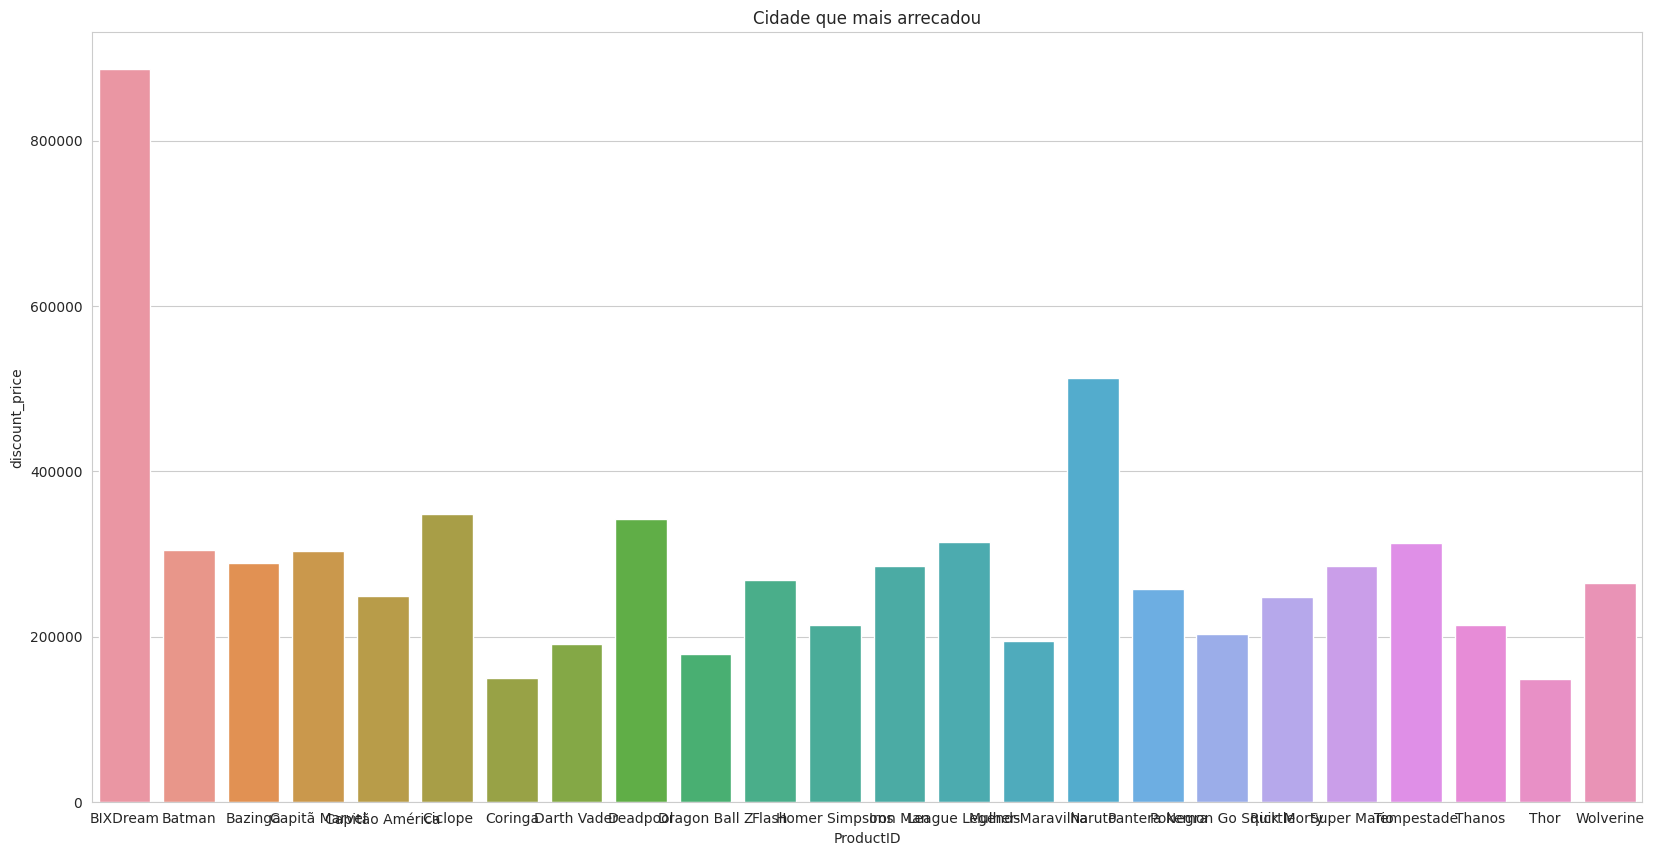

In [17]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df_best_consumer_sum, \
            x='ProductID', \
            y='discount_price').set_title('Cidade que mais arrecadou')

In [18]:
final_table_columns = ['ProductID','Quantity']
df_best_size = df_sales[df_sales.columns.intersection(final_table_columns)]
df_best_size

,ProductID,Quantity
0,002552c0663708129c0019cc97552d7d3,1
1,001b237c0e9bb435f2e54071129237e93,1
2,00066f42aeeb9f3007548bb9d3f33c381,1
3,001b72dfd63e9833e8c02742adf472e33,2
4,00210e41887c2a8ef9f791ebc780cc363,1
...,...,...
32748,002ec297b1b00fb9dde7ee6ac24b67712,1
32749,002d4ea7c04739c130bb74d7e7cd16943,1
32750,001795ec6f1b187d37335e1c4704762e3,1
32751,002ec297b1b00fb9dde7ee6ac24b67713,2


In [19]:
df_best_size_name = df_best_size
for ID in range(len(df_best_size['ProductID'])):
    for ProductID in range(len(df_consumer['ID'])):
        if df_best_size['ProductID'][ID] == df_consumer['ID'][ProductID]:
            # df_best_size_name['ProductID'][ID] = df_consumer['Name'][ProductID]
            df_best_size_name['ProductID'] = df_best_size_name['ProductID'].replace([df_best_size_name['ProductID'][ID]], df_consumer['Size'][ProductID])

df_best_size_name

/tmp/ipykernel_48625/2968160882.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_size_name['ProductID'] = df_best_size_name['ProductID'].replace([df_best_size_name['ProductID'][ID]], df_consumer['Size'][ProductID])


,ProductID,Quantity
0,G,1
1,G,1
2,P,1
3,G,2
4,G,1
...,...,...
32748,M,1
32749,G,1
32750,G,1
32751,G,2


In [20]:
df_best_size_name_sum = df_best_size_name.groupby('ProductID', as_index =False).sum()
df_best_size_name_sum

,ProductID,Quantity
0,G,22865
1,GG,432
2,M,5550
3,P,5827


Text(0.5, 1.0, 'Cidade que mais arrecadou')

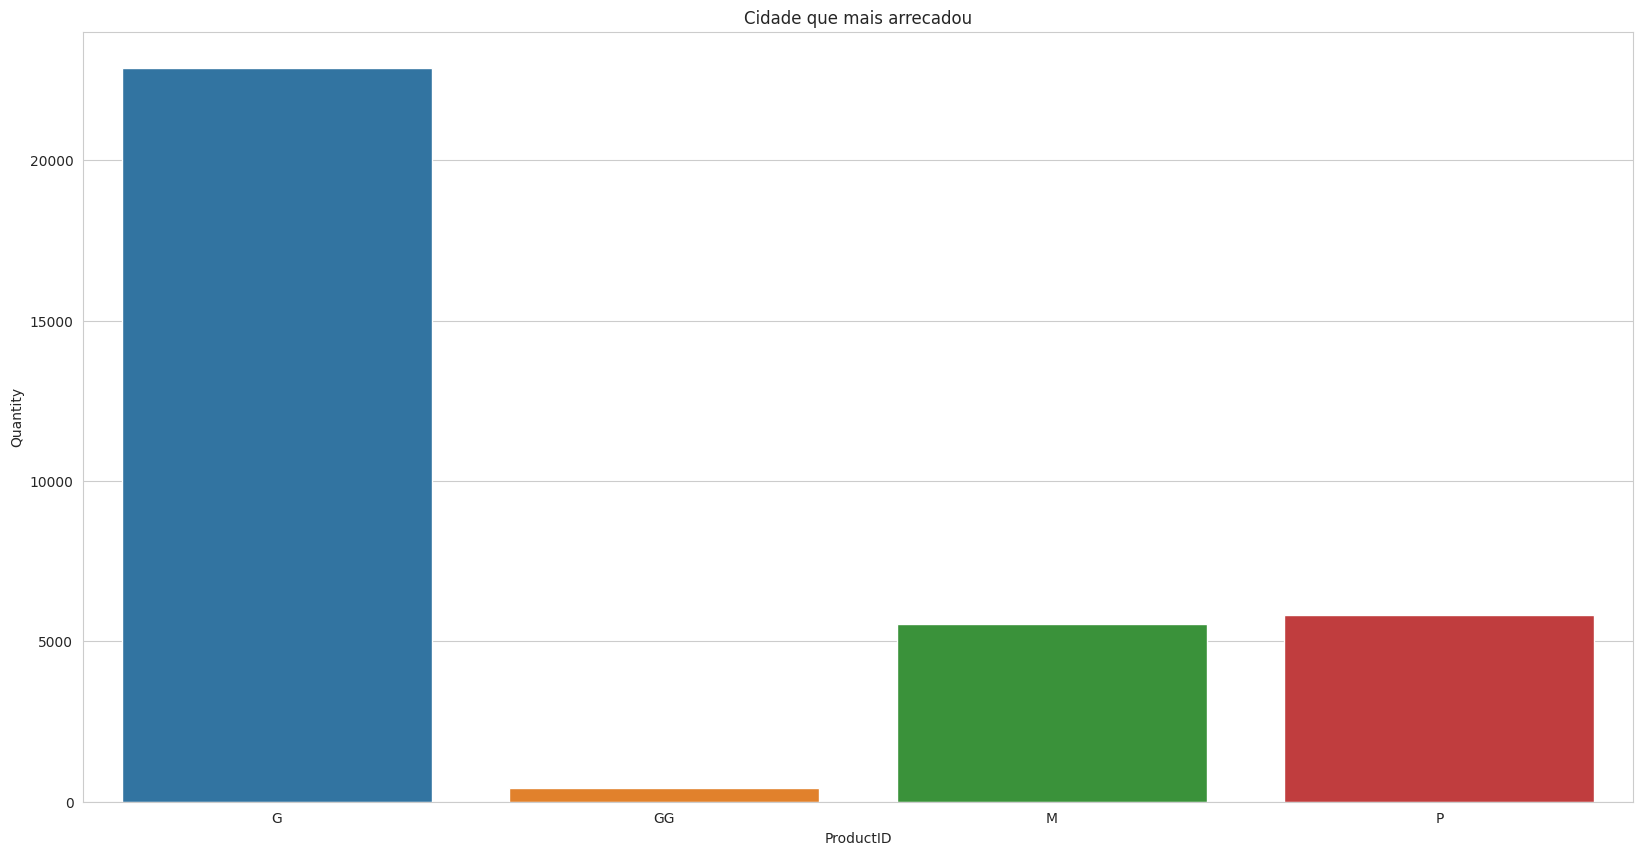

In [21]:
plt.figure(figsize = (20, 10))
sns.barplot(data = df_best_size_name_sum, \
            x='ProductID', \
            y='Quantity').set_title('Cidade que mais arrecadou')

In [22]:
final_table_columns = ['ClientID','Quantity']
df_best_Client = df_sales[df_sales.columns.intersection(final_table_columns)]
df_best_Client

,ClientID,Quantity
0,14001,1
1,14001,1
2,14001,1
3,14002,2
4,14002,1
...,...,...
32748,28694,1
32749,28694,1
32750,28694,1
32751,28694,2


In [23]:
for ID in range(len(df_best_Client['ClientID'])):
    for ProductID in range(len(df_store['ID'])):
        if df_best_Client['ClientID'][ID] == df_store['ID'][ProductID]:
            # df_best_size_name['ProductID'][ID] = df_consumer['Name'][ProductID]
            df_best_Client['ClientID'] = df_best_Client['ClientID'].replace([df_best_Client['ClientID'][ID]], \
                                                                                      df_store['City'][ProductID])

df_best_Client

/tmp/ipykernel_48625/38551082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best_Client['ClientID'] = df_best_Client['ClientID'].replace([df_best_Client['ClientID'][ID]], \


KeyboardInterrupt: 

In [ ]:
# df_best_size_name_sum = df_best_size_name.groupby('ProductID', as_index =False).sum()
# df_best_size_name_sum